In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [4]:
data=pd.read_csv("multiple_linear_regression.csv")

In [5]:
data.head()

,Feature 1,Feature 2,Feature 3,Target
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Feature 1  200 non-null    float64
 1   Feature 2  200 non-null    float64
 2   Feature 3  200 non-null    float64
 3   Target     200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
output_col="Target"

 ## Data Preprocessing`

In [9]:
# input
x=data.iloc[:,data.columns != output_col]

In [10]:
# output
y=data.loc[:,output_col]

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=43)

## <font color="orange">Multiple Linear Regression</font>

## Training

In [12]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [13]:
lr.coef_

array([ 0.0459782 ,  0.18092867, -0.00194226])

In [14]:
lr.intercept_

3.0777744955280504

## Prediction

In [15]:
pred_value=lr.predict(x_test)

### Cost

In [16]:
from sklearn.metrics import mean_squared_error
cost=mean_squared_error(y_test,pred_value)
cost

2.241286253093347

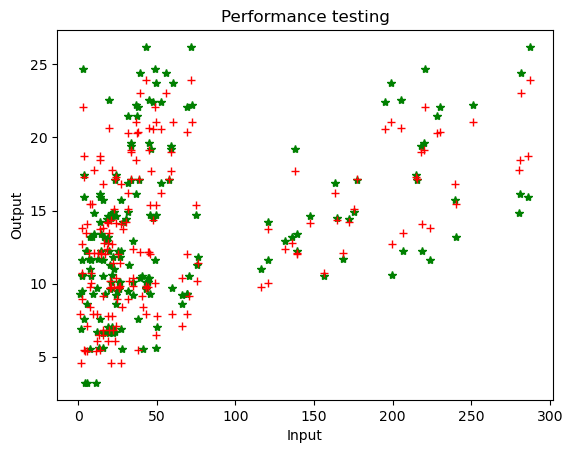

In [17]:
plt.plot(x_test,y_test    ,"*",color = "green")
plt.plot(x_test,pred_value,"+",color = "red"  )
plt.title("Performance testing")
plt.xlabel ("Input" )
plt.ylabel ("Output" )
plt.show()

## Homoscedasticity 

In [18]:
pred_value

array([ 8.41710143, 15.36146115, 12.08619274,  9.75953058, 11.37799221,
       18.73526253, 23.94158412,  7.11931733, 22.06606191, 16.83172907,
        7.93115903, 23.07243791, 19.15729792,  5.47677475, 15.42102256,
        9.82205717, 12.08023645,  9.76094922, 21.07717663,  9.13945016,
       20.36205828, 12.03862691, 13.78082146, 10.73225482, 16.20061541,
        7.77042699, 20.6251206 , 20.31966315,  8.97266008, 14.13746173,
       17.28381353, 15.13827164, 17.18376843, 19.03374633, 17.13952183,
       12.14670527, 12.7815946 ,  6.08135492, 10.06634988, 13.48921606,
       12.01549843,  9.70107337,  5.35398678, 10.14966171, 14.224196  ,
       14.04780871, 14.33053495, 10.39465714, 21.04417964, 13.74703482,
        6.4651166 ,  7.90550808, 17.69866554, 17.74668208, 12.39498913,
       12.69345805, 20.58946722, 18.4269009 ,  4.59145621,  6.82129794])

In [19]:
residuals=y_test-pred_value

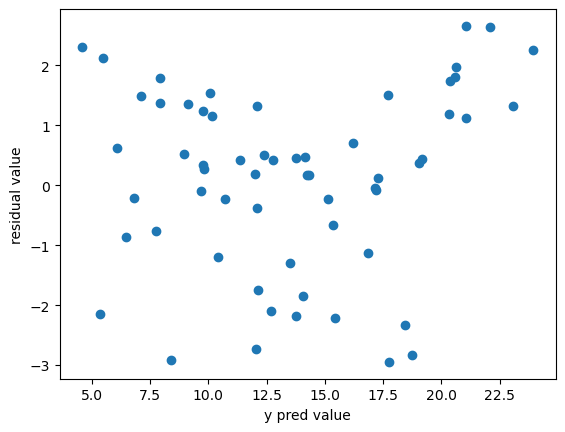

In [20]:
plt.scatter(pred_value,residuals)
plt.xlabel("y pred value")
plt.ylabel("residual value")
plt.show()

## Normality Of The Residuals

/var/folders/5l/4gfqk8xn2nq4hj7flx0t9kbm0000gn/T/ipykernel_8189/2665350104.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals)


<Axes: xlabel='Target', ylabel='Density'>

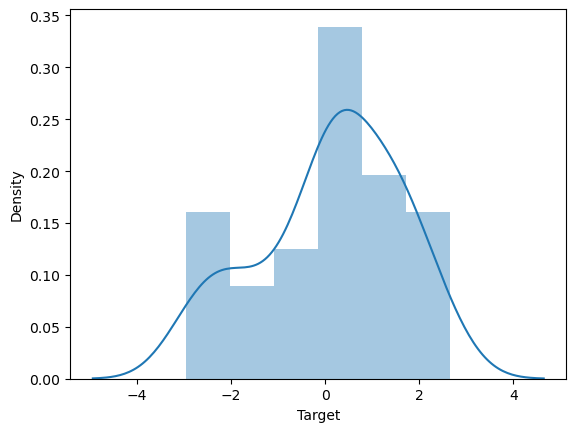

In [22]:
sns.distplot(residuals)

# <font color ="pink">Ordinary Least Square (OLS) Method</font>

In [23]:
import statsmodels.api as sm

In [24]:
x_with_constant=sm.add_constant(x_train)

In [26]:
x_with_constant

,const,Feature 1,Feature 2,Feature 3
71,1.0,109.8,14.3,31.7
90,1.0,134.3,4.9,9.3
100,1.0,222.4,4.3,49.8
44,1.0,25.1,25.7,43.3
94,1.0,107.4,14.0,10.9
...,...,...,...,...
58,1.0,210.8,49.6,37.7
21,1.0,237.4,5.1,23.5
49,1.0,66.9,11.7,36.8
64,1.0,131.1,42.8,28.9


In [27]:
model=sm.OLS(y_train,x_with_constant)

In [28]:
result=model.fit()

In [29]:
result.params

const        3.077774
Feature 1    0.045978
Feature 2    0.180929
Feature 3   -0.001942
dtype: float64

In [30]:
lr.coef_

array([ 0.0459782 ,  0.18092867, -0.00194226])

In [32]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     346.9
Date:                Sat, 18 Nov 2023   Prob (F-statistic):           1.67e-63
Time:                        09:36:56   Log-Likelihood:                -276.47
No. Observations:                 140   AIC:                             560.9
Df Residuals:                     136   BIC:                             572.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0778      0.398      7.735      0.0